# Explatortary Design Analysis (EDA)

## Import Library

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read The Dataset

In [10]:
# Membaca dataset dari file csv
data = pd.read_csv('garments_worker_productivity.csv')

# Menampilkan 5 data pertama
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [11]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

Keterangan untuk setiap kolom:
1. date			:	Date in MM-DD-YYYY
2. day			:	Day of the Week
3. quarter			:	A portion of the month. A month was divided into four quarters
4. department		:	Associated department with the instance
5. team			:	Associated team number with the instance
6. no_of_workers		:	Number of workers in each team
7. no_of_style_change	:	Number of changes in the style of a particular product
8. targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
9. smv			:	Standard Minute Value, it is the allocated time for a task
10. wip			:	Work in progress. Includes the number of unfinished items for products
11.	over_time		:	Represents the amount of overtime by each team in minutes
12.	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13.	idle_time		:	The amount of time when the production was interrupted due to several reasons
14.	idle_men		:	The number of workers who were idle due to production interruption
15.	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [12]:
# Melihat tipe data setiap kolom
data.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [14]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Dari statistik deskriptif diketahui, bahwa:
1. Rata-rata target produktif adalah 72%.
2. Rata-rata Standard minute value adalah 15 menit.
3. Rata-rata work in progress adalah 1190.
4. Rata-rata lembur adalah 4567 menit.
5. Rata-rata insentif adalah 38 BDT
6. Rata-rata waktu diam adalah 0.7
7. Rata-rata orang yang sedang diam adalah 0.3 atau bisa dibilang hampir tidak ada.
8. Rata-rata gaya produksi diganti adalah 15%.
9. Rata-rata pegawai adalah 34.
10. Rata-rata produktivitas adalah 73%

In [15]:
# Melihat jumlah baris dan kolom dari dataset
data.shape

(1197, 15)

## Visualization For Each Features

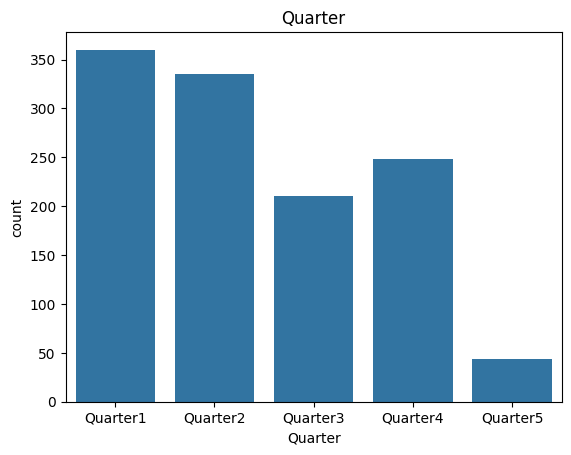

In [16]:
# Melihat distribusi kuartal
plt.title('Quarter')
sns.countplot(x=data['quarter'], data=data)
plt.xlabel('Quarter')
plt.show()

In [17]:
# Mengecek jumlah tiap departement
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [18]:
# Cek kenapa finishin bisa double, mungkin ada perbedaan penulisan
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In [19]:
# Buat semua data department menggunakan huruf kecil dan tidak ada spasi sebelum atau setelahnya
data['department'] = data['department'].str.lower().str.strip()

In [20]:
# Mengecek kembali
print(data['department'].value_counts())

department
sweing       691
finishing    506
Name: count, dtype: int64


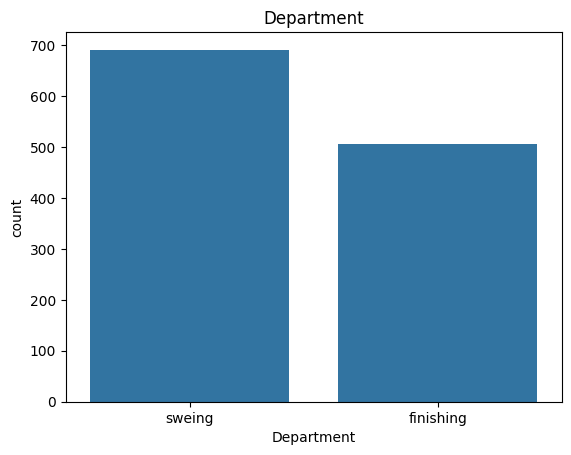

In [21]:
# Melihat distribusi department
plt.title('Department')
sns.countplot(x=data['department'], data=data)
plt.xlabel('Department')
plt.show()

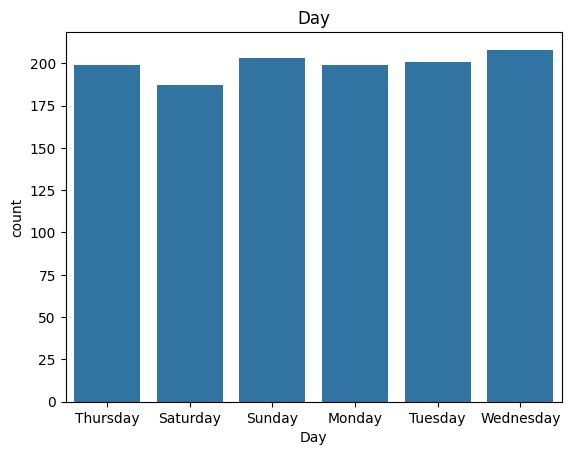

In [22]:
# Melihat data setiap harinya dalam seminggu
plt.title('Day')
sns.countplot(x=data['day'], data=data)
plt.xlabel('Day')
plt.show()

In [ ]:
# Melihat setiap tim
data['team'].value_counts()

team
8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

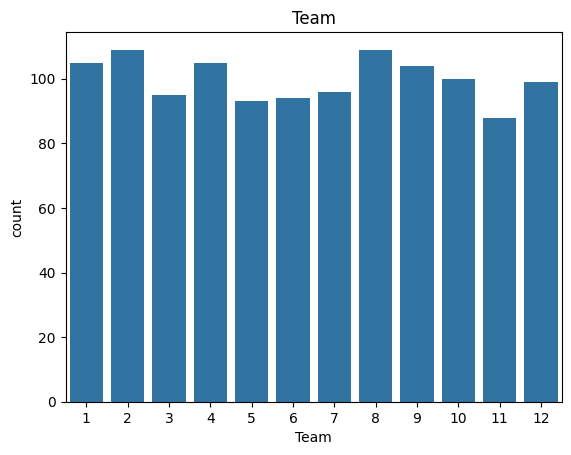

In [23]:
# Melihat distribusi tiap tim
plt.title('Team')
sns.countplot(x=data['team'], data=data)
plt.xlabel('Team')
plt.show()

5 tim yang memiliki data tertinggi adalah 8, 4, 2, dan 1.

In [24]:
# Cek missing values
print(data.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


Ada beberapa data kosong pada work in progress, yaitu sebanyak 506 kolom.

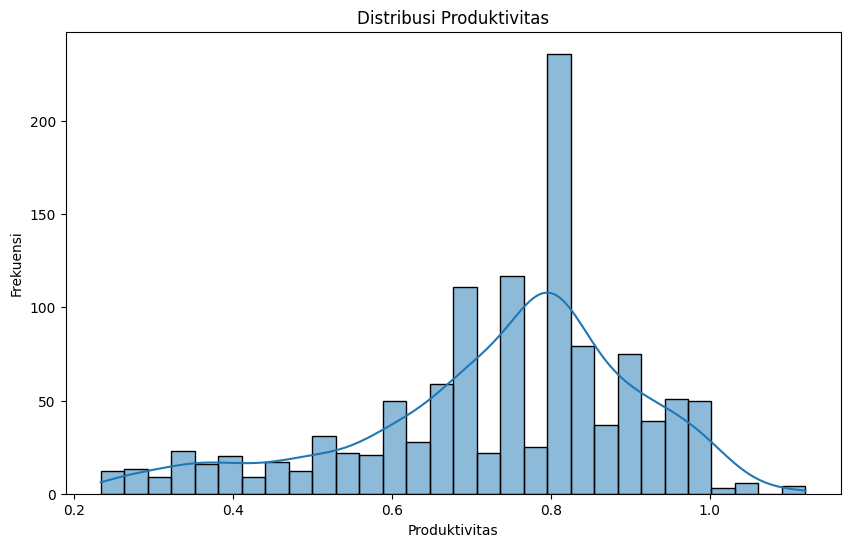

In [25]:
# Visualisasi distribusi produktivitas
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_productivity'], bins=30, kde=True)
plt.title('Distribusi Produktivitas')
plt.xlabel('Produktivitas')
plt.ylabel('Frekuensi')
plt.show()

Tingkat produktivitas aktual 0.8 memiliki frekuensi yang tinggi.

## Visualization Relationship Between Features

### Melihat pola produktivitas berdasarkan waktu

C:\Users\USER\AppData\Local\Temp\ipykernel_10800\3670611194.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='actual_productivity', data=data, ci=None)


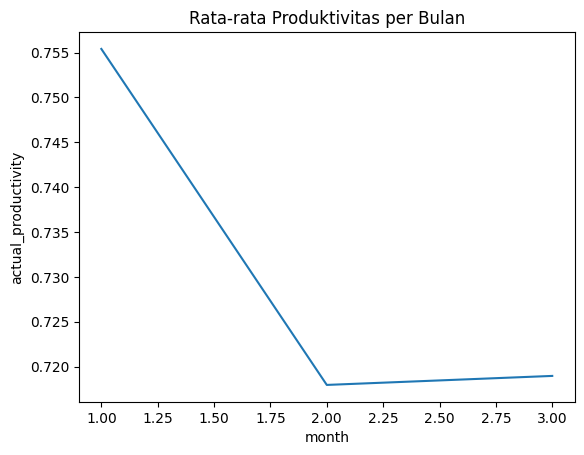

In [26]:
# Konversi ke datetime
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

# Melihat produktivitas per bulan
data['month'] = data['date'].dt.month
sns.lineplot(x='month', y='actual_productivity', data=data, ci=None)
plt.title("Rata-rata Produktivitas per Bulan")
plt.show()

Di bulan pertama memiliki tingkat produktivitas yang tinggi, tetapi seiring berjalannya waktu mulai menurun dan kembali stabil pada bulan ke-2.

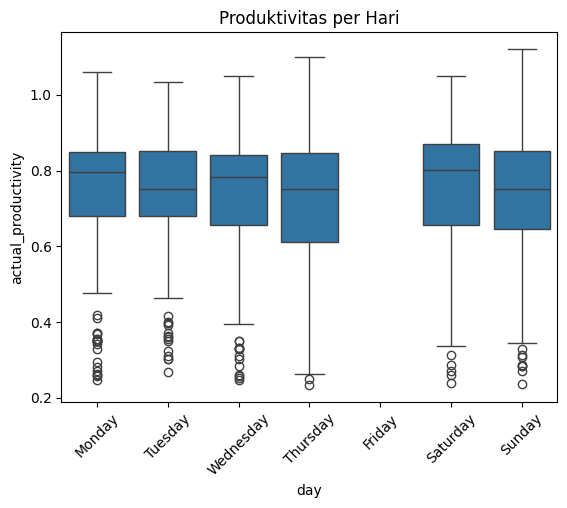

In [27]:
# Melihat produktivitas harian
sns.boxplot(x='day', y='actual_productivity', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Produktivitas per Hari")
plt.xticks(rotation=45)
plt.show()

Tidak adanya data pada hari jumat menandakan bahwa kemungkinan pegawai sedang libur. Sementara tingkat produktivitas paling tinggi dipegang pada hari Sabtu.

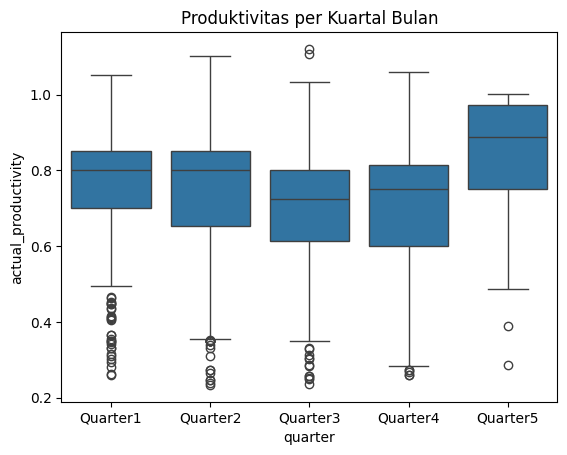

In [28]:
# Melihat produktivitas kuartal
sns.boxplot(x='quarter', y='actual_productivity', data=data)
plt.title("Produktivitas per Kuartal Bulan")
plt.show()

Pegawai memiliki produktivitas tertinggi pada kuartal ke 5 dan memiliki banyak outlier pada kuartal ke 1.

### Melihat Produktivitas tiap Departemen

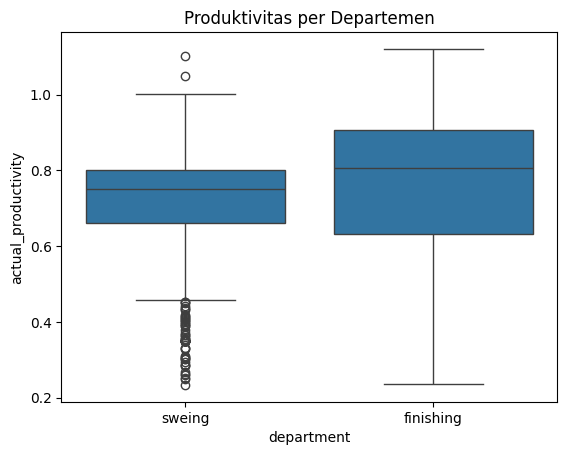

In [ ]:
plt.title("Produktivitas per Departemen")
sns.boxplot(x='department', y='actual_productivity', data=data)
plt.show()

Department finishing memiliki tingkat produktivitas yang lebih tinggi daripada sweing.

### Melihat Produktivitas tiap Tim

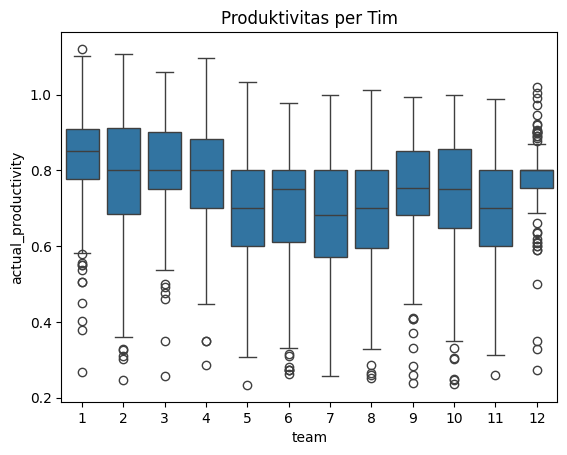

In [ ]:
sns.boxplot(x='team', y='actual_productivity', data=data)
plt.title("Produktivitas per Tim")
plt.show()

Tim 12 menjadi tim dengan outlier terbanyak sehingga dapat dilihat tidak terlalu konsisten dalam tingkat produktivitas. Sementara tim 4, 7, 5, 11 memiliki tingkat kestabilan yang baik. Tingkat produktivitas yang titnggi dipegang oleh tim 1, 2, dan 3.

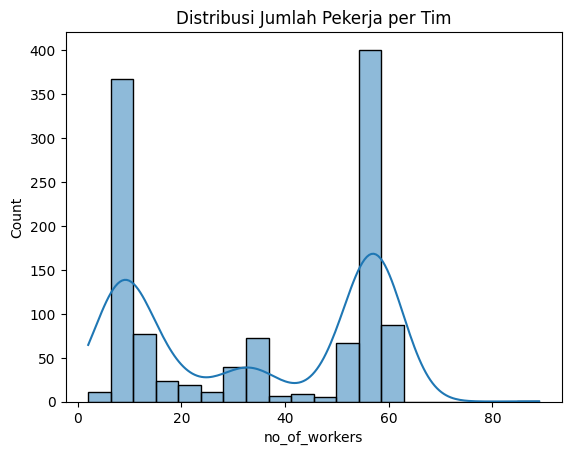

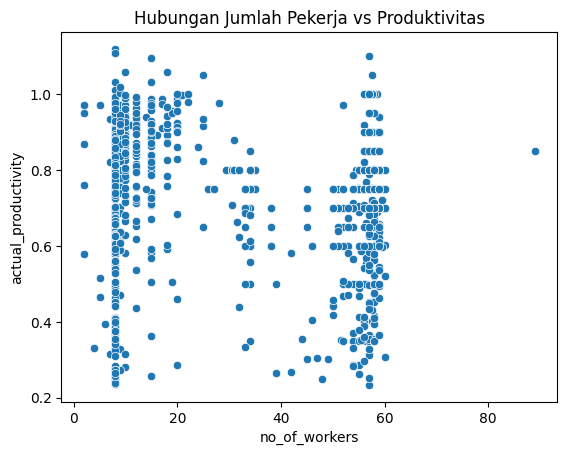

In [31]:
# Produktivitas berdasarkan jumlah pekerja per tim
sns.histplot(data['no_of_workers'], bins=20, kde=True)
plt.title("Distribusi Jumlah Pekerja per Tim")
plt.show()

sns.scatterplot(x='no_of_workers', y='actual_productivity', data=data)
plt.title("Hubungan Jumlah Pekerja vs Produktivitas")
plt.show()

Semakin banyak pegawai belum tentu semakin tinggi produktivitasnya, begitupun sebaliknya semakin sedikit juga belum tentu produktivitasnya tinggi. 

### Melihat Produktivitas bedasarkan Perubahan Gaya Produk

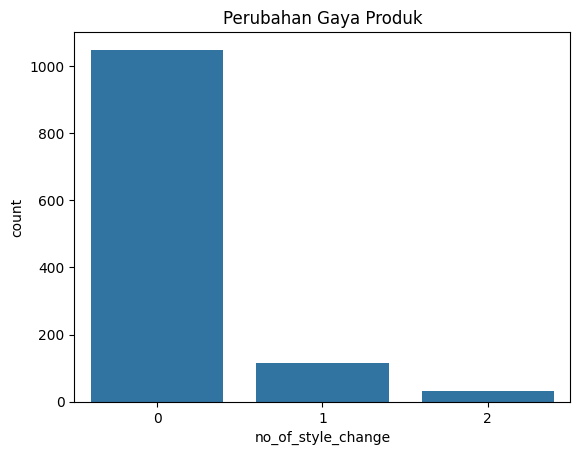

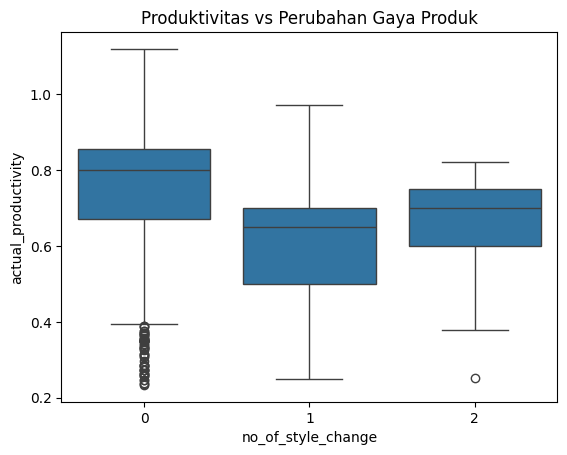

In [ ]:
sns.countplot(x='no_of_style_change', data=data)
plt.title("Perubahan Gaya Produk")
plt.show()

sns.boxplot(x='no_of_style_change', y='actual_productivity', data=data)
plt.title("Produktivitas vs Perubahan Gaya Produk")
plt.show()

Kebanyakan dalam tugas jarang terjadi perubahan pada gaya bekerja.

### Cek Target yang telah ada apakah sudah sesuai dengan produktivitas aslinya

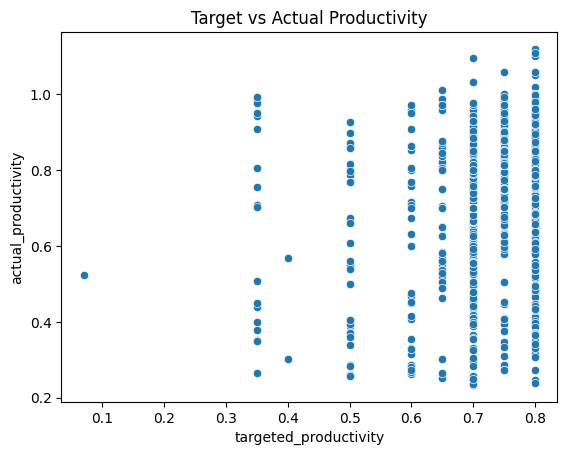

In [ ]:
sns.scatterplot(x='targeted_productivity', y='actual_productivity', data=data)
plt.title("Target vs Actual Productivity")
plt.show()

Target tinggi belum tentu mencapai hasil yang tinggi juga. Ada yang menargetkan rendah tetapi malah memiliki produktivitas yang tinggi.

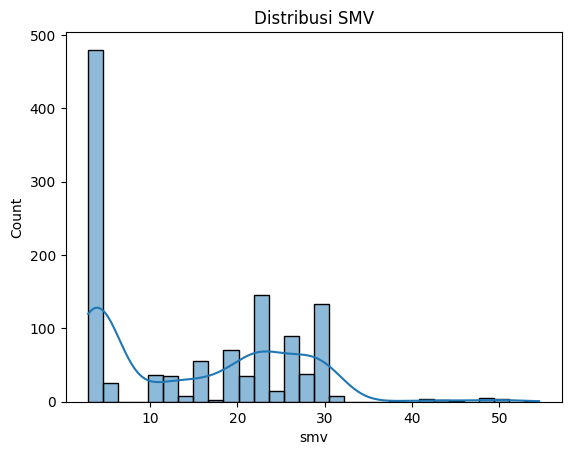

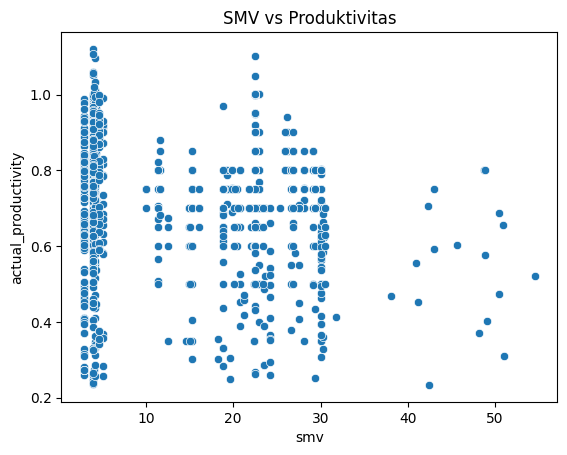

In [34]:
# standar minute value yang tinggi punya produktivitas berapa
sns.histplot(data['smv'], bins=30, kde=True)
plt.title("Distribusi SMV")
plt.show()

sns.scatterplot(x='smv', y='actual_productivity', data=data)
plt.title("SMV vs Produktivitas")
plt.show()

SMV tinggi berarti tugas lebih sulit atau bisa juga memakan waktu. Pegawai mungkin kesulitan memenuhi target waktu.

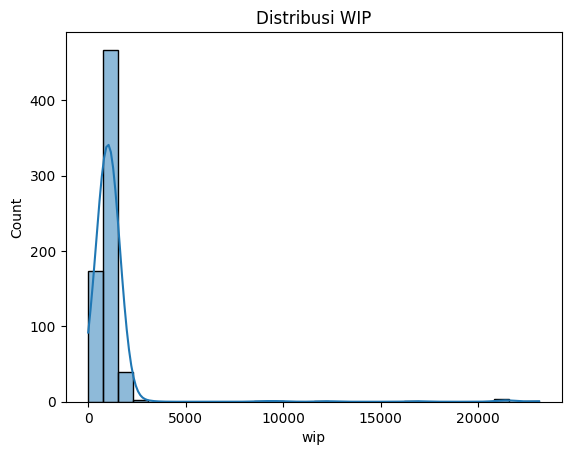

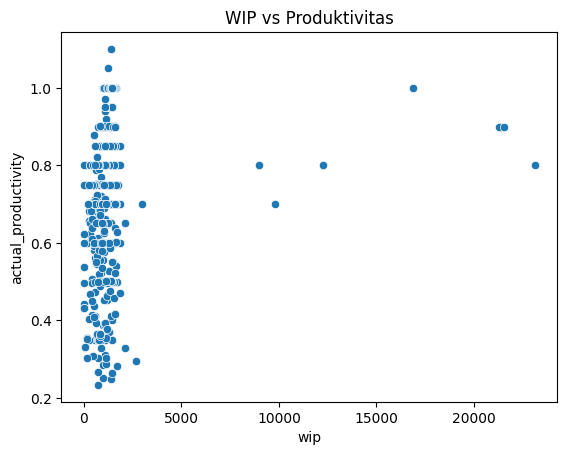

In [35]:
# Hubungan work in progress dengan produktivitas
plt.title("Distribusi WIP")
sns.histplot(data['wip'].dropna(), bins=30, kde=True)
plt.show()

plt.title("WIP vs Produktivitas")
sns.scatterplot(x='wip', y='actual_productivity', data=data)
plt.show()

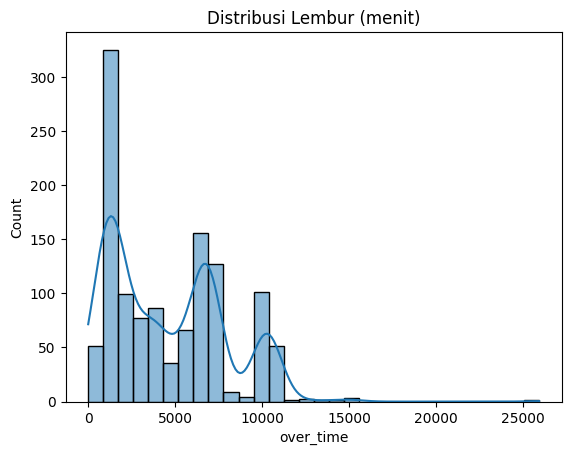

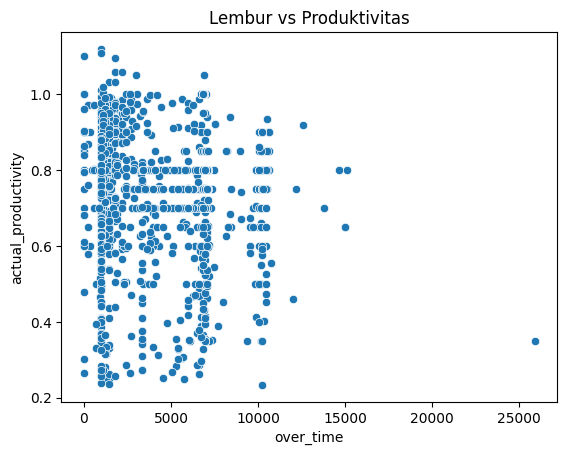

In [36]:
# Hubungan lembur dengan produktivitas
plt.title("Distribusi Lembur (menit)")
sns.histplot(data['over_time'], bins=30, kde=True)
plt.show()

plt.title("Lembur vs Produktivitas")
sns.scatterplot(x='over_time', y='actual_productivity', data=data)
plt.show()

Pegawai tidak terlalu banyak melakukan lembur. Dapat dilihat bahwa dengan lembur semakin banyak tingkat produktivitasnya lebih tinggi. Tetapi ada beberapa yang karena lembur banyak menjadi kurang produktif.

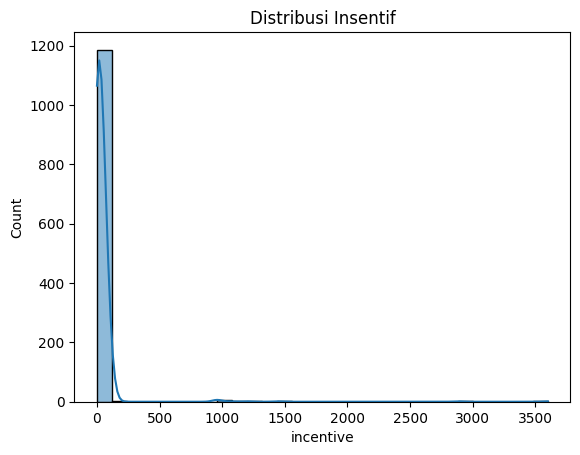

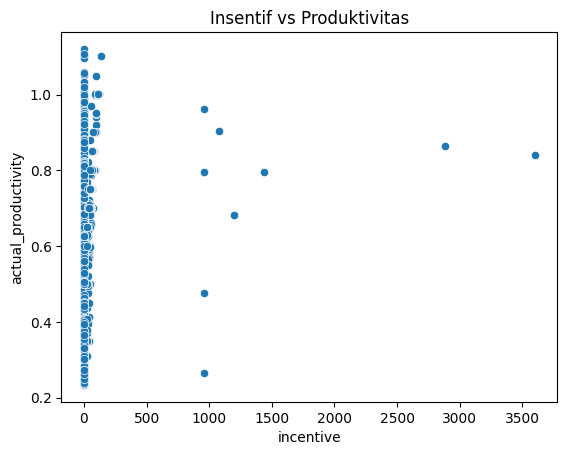

In [37]:
# Hubungan insentif dengan produktivitas
plt.title("Distribusi Insentif")
sns.histplot(data['incentive'], bins=30, kde=True)
plt.show()

plt.title("Insentif vs Produktivitas")
sns.scatterplot(x='incentive', y='actual_productivity', data=data)
plt.show()

Hanya ada beberapa pegawai yang mendapatkan insentif tinggi ketika memiliki produktivitas tinggi, hal ini membuktikan bahwa produktivitas tinggi tidak mempengaruhi penambahan insentif.

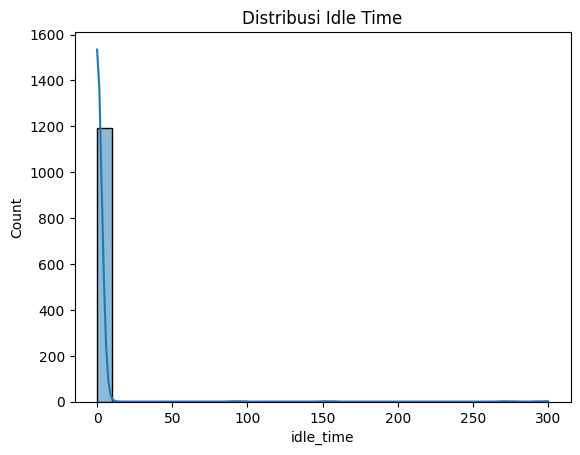

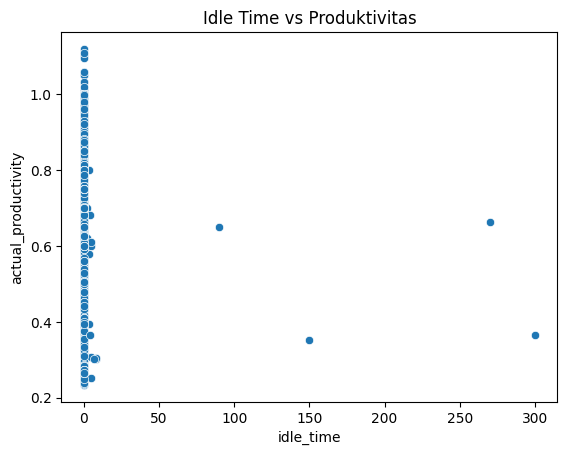

In [38]:
# Hubungan waktu diam dengan produktivitas
sns.histplot(data['idle_time'], bins=30, kde=True)
plt.title("Distribusi Idle Time")
plt.show()

sns.scatterplot(x='idle_time', y='actual_productivity', data=data)
plt.title("Idle Time vs Produktivitas")
plt.show()

Pegawai tidak banyak berdiam diri dan lebih banyak melakukan pekerjaannya.

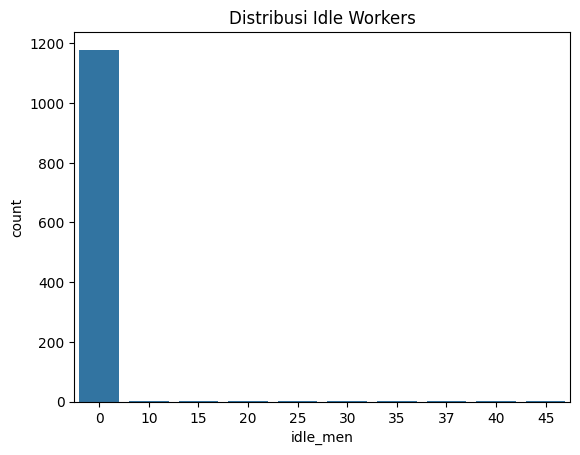

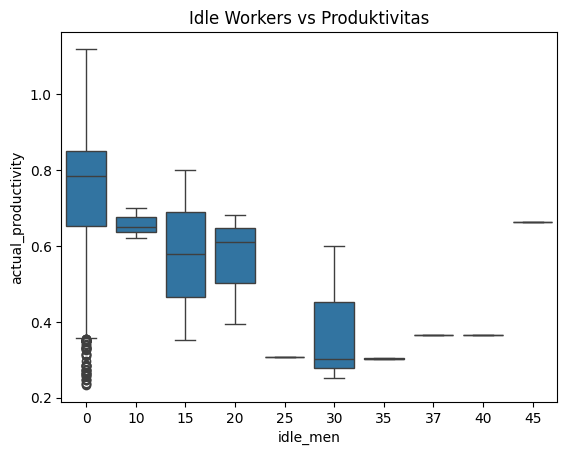

In [39]:
# Hubungan pegawai yang menganggur dengan produktivitas
plt.title("Distribusi Idle Workers")
sns.countplot(x='idle_men', data=data)
plt.show()

sns.boxplot(x='idle_men', y='actual_productivity', data=data)
plt.title("Idle Workers vs Produktivitas")
plt.show()

Jumlah pegawai yang menganggur lebih sedikit maka menghasilkan produktivitas yang lebih tinggi.

## Hubungan antar fitur

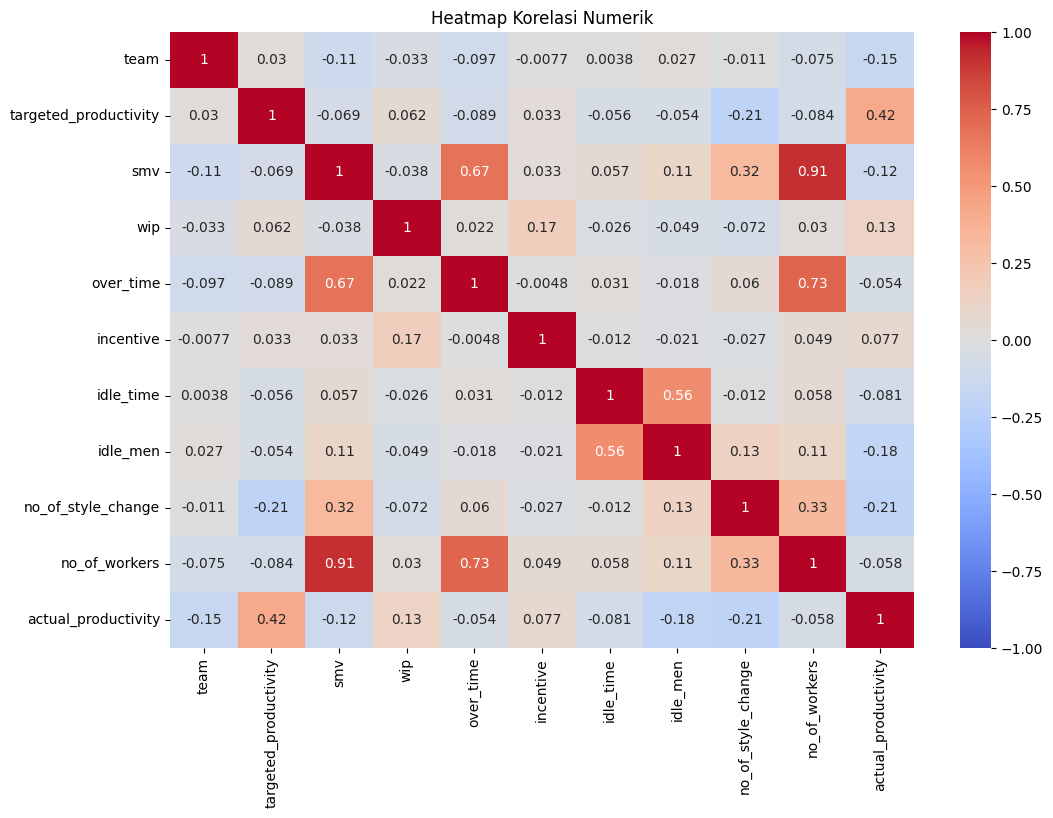

In [ ]:
# Menampilkan heatmap untuk korelasi setipa fitur numerik
corr = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Numerik")
plt.show()

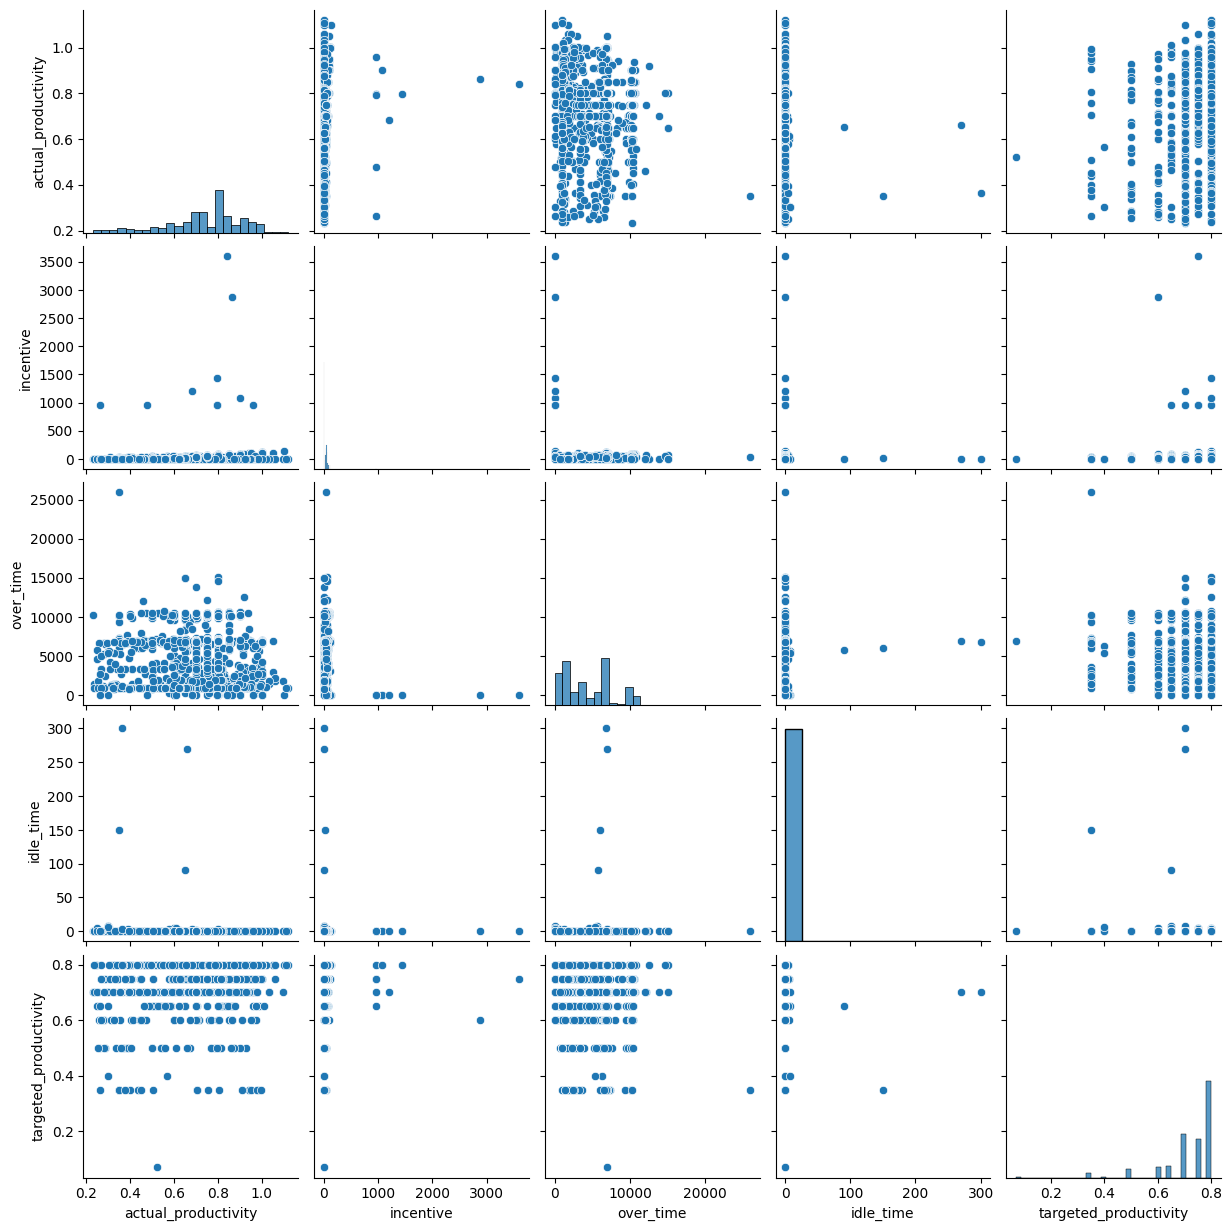

In [ ]:
# Menampilkan pairplot untuk tiap numerik
sns.pairplot(data[['actual_productivity', 'incentive', 'over_time', 'idle_time', 'targeted_productivity']])
plt.show()

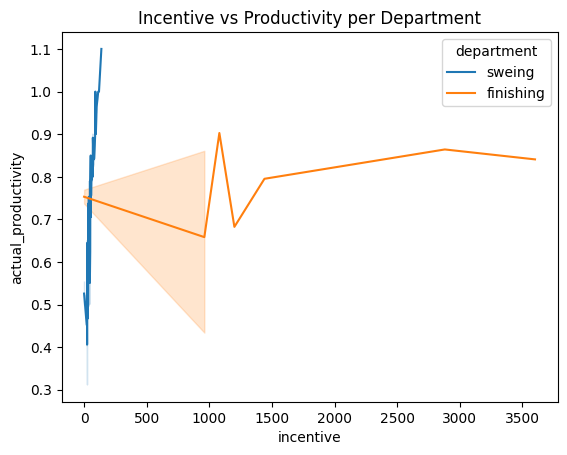

In [42]:
# hubungan insentif dengan departemen dan produktivitas
sns.lineplot(x='incentive', y='actual_productivity', hue='department', data=data)
plt.title("Incentive vs Productivity per Department")
plt.show()

Insentif pada departement finishing jauh lebih besar daripada sweing meskipun produktivitasnya tidak setinggi departement sweing.